# Analysis of 6 monthly returns

In [1]:
#General & Data transformation
import numpy as np
import pandas as pd 

#Plotting
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

#Train test split
from sklearn.model_selection import train_test_split

#Pipeline and modeling
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import neighbors
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier

In [2]:
#import data
df = pd.read_csv('output/outputCopy.csv', sep=';')
df.head()

,permno,adate,qdate,public_date,CAPEI,bm,evm,pe_op_basic,pe_op_dil,pe_exi,...,return3months,return4months,return5months,return6months,return7months,return8months,return9months,return10months,return11months,return12months
0,10107,30.06.2005,30.09.2005,31.01.2006,33.861,0.176,15.245,23.074,23.264,23.856,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10107,30.06.2005,31.12.2005,28.02.2006,31.756,0.163,14.951,21.496,21.846,22.392,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10107,30.06.2005,31.12.2005,31.03.2006,31.820,0.163,14.951,21.768,22.122,22.675,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10107,30.06.2005,31.12.2005,30.04.2006,28.176,0.163,14.951,19.320,19.634,20.125,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10107,30.06.2005,31.03.2006,31.05.2006,25.921,0.151,15.120,17.695,17.835,17.976,...,-0.157052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


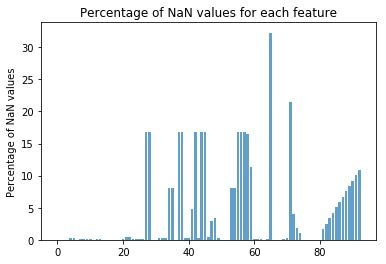

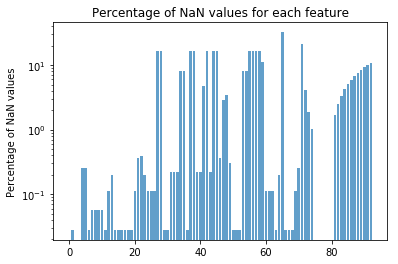

In [3]:
#NaN values check and show as bar chart

dfn = np.array(df)
yaxis = []
for i in df:
    yaxis.append((df[i].isnull().sum()/len(df[i]))*100)
    
xaxis = np.arange(0, len(df.columns))
#Graph1 linear scale
plt.bar(xaxis, yaxis, align='center', alpha=0.7)
plt.ylabel('Percentage of NaN values')
plt.title('Percentage of NaN values for each feature')
plt.show()

#Graph2 log scale
plt.bar(xaxis, yaxis, align='center', alpha=0.7)
plt.ylabel('Percentage of NaN values')
plt.yscale('log')
plt.title('Percentage of NaN values for each feature')
plt.show()

  

##### Insert response column (stock goes up = 1 , stock goes down = 0)
decided that if the return is equal to 0 it is classified as negative, as there are still costs associated with trading

In [4]:
support_response_vector = []
#Trailing needs to be removed, to shift everything by one down -> no need to handle all companies first value, as it gets removed when cleaning for NaN values
for i in df['return6months']:
    if i <= 0: 
        support_response_vector.append(0)
    else:
        support_response_vector.append(1)
#for the 6 last values something needs to be added to have the correct length
support_response_vector.append(-1)
support_response_vector.append(-1)
support_response_vector.append(-1)
support_response_vector.append(-1)
support_response_vector.append(-1)
support_response_vector.append(-1)
df['response'] = support_response_vector[6:]
#the extra added -1 line gets removed here again
df = df.drop(len(df[1:]))
df = df.drop(len(df[1:]))
df = df.drop(len(df[1:]))
df = df.drop(len(df[1:]))
df = df.drop(len(df[1:]))
df = df.drop(len(df[1:]))


In [5]:
#print(df['response'])
df.to_csv('output/final2_6months.csv')

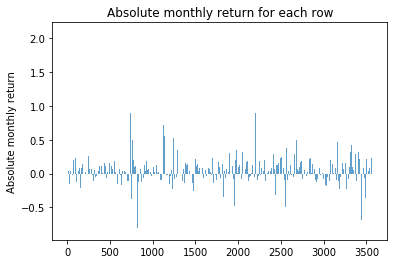

In [6]:
#Plotting the returns for the time period
support_returns_absolute = []
for i in df['return6months']:
    support_returns_absolute.append(i)

xaxis3 = np.arange(0, len(df['return6months']),1)
yaxis3 = support_returns_absolute

#Graph3 Returns linear scale
plt.bar(xaxis3, yaxis3, align='center', alpha=0.7)
plt.ylabel('Absolute monthly return')
plt.title('Absolute monthly return for each row')
plt.show()

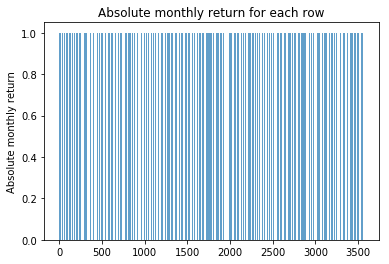

amount of 0: 1266
amount of 1: 2300
total amount of rows should be: 3566


(3566, 94)

In [7]:
#Plot the responses assigned in regards of the row
support_returns_classified= []
for i in df['response']:
    support_returns_classified.append(i)

xaxis4 = np.arange(0, len(df['response']),1)
yaxis4 = support_returns_classified

#Graph4 Returns-classified linear scale
plt.bar(xaxis4, yaxis4, align='center', alpha=0.7)
plt.ylabel('Absolute monthly return')
plt.title('Absolute monthly return for each row')
plt.show()

miss = 0
hits = 0
for a in yaxis4:
    if a == 1:
        hits += 1
    else:
        miss += 1
        
print('amount of 0: ' + str(miss))
print('amount of 1: ' + str(hits))

print('total amount of rows should be: ' + str(miss+hits))
df.shape

([<matplotlib.patches.Wedge at 0x1d57d87d940>,
 [Text(0.483872,0.98786,'Stock Down Next Period'),
  Text(-0.483872,-0.98786,'Stock Up Next Period')],
 [Text(0.26393,0.538833,'35.5%'), Text(-0.26393,-0.538833,'64.5%')])

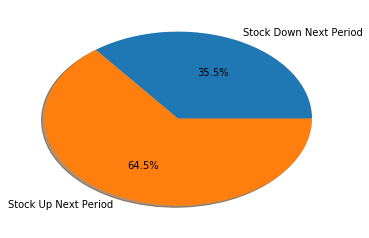

In [8]:
labels = 'Stock Down Next Period', 'Stock Up Next Period'
fracs = []
fracs.append(miss)
fracs.append(hits)

plt.pie(fracs, labels=labels, autopct='%1.1f%%', shadow=True)

Decided that, because of not a huge skew between the distribution we dont need to balance the set.

##### Dealing with NaN values in Columns
Decision: Drop everything where percentage of NaN > 5%

In [9]:
columns_to_drop = []
for i in df:
    if ((df[i].isnull().sum()/len(df[i]))*100) > 5:
        columns_to_drop.append(i)

print('Dropped columns: ')
print(columns_to_drop)
#update dataframe to remove columns
df = df.drop(columns_to_drop, axis = 1)

Dropped columns: 
['pretret_noa', 'pretret_earnat', 'int_debt', 'int_totdebt', 'invt_act', 'rect_act', 'curr_debt', 'profit_lct', 'ocf_lct', 'intcov', 'intcov_ratio', 'cash_ratio', 'quick_ratio', 'curr_ratio', 'cash_conversion', 'inv_turn', 'sale_nwc', 'PEG_trailing', 'return5months', 'return6months', 'return7months', 'return8months', 'return9months', 'return10months', 'return11months', 'return12months']


In [10]:
#Dropping the rows which are the 6 values of a companies data-set
rows_to_drop = []
z = 0
for i in df['permno']:
    
    if df.iloc[z][0] != df.iloc[z+5][0]:
        rows_to_drop.append(z)
        rows_to_drop.append(z+1)
        rows_to_drop.append(z+2)
        rows_to_drop.append(z+4)
        z += 4
    z += 1
    if z == len(df)-6:
        break

##### Dealing with NaN values in Rows
Decision: Drop everything where there are more than 0 NaN value

In [11]:
nan_row_numbers = df.isnull().sum(axis=1).tolist()
for i in range(0, len(nan_row_numbers)):
    if (nan_row_numbers[i]) > 0:
        rows_to_drop.append(i)
        
print('amount of rows dropped = ' + str(len(rows_to_drop)) + ' of ' + str(len(df)))

#update dataframe to remove rows
df = df.drop(rows_to_drop) 

amount of rows dropped = 758 of 3566


In [12]:
print('NaN values left in table: ' + str(df.isnull().sum().sum()))
df.head(50)

NaN values left in table: 0


,permno,adate,qdate,public_date,CAPEI,bm,evm,pe_op_basic,pe_op_dil,pe_exi,...,dowjones,5yUSTreasuryBond,1yUSTreasuryBond,90dUSBills,USInflation,return1months,return2months,return3months,return4months,response
31,10107,30.06.2008,30.06.2008,31.08.2008,19.236,0.144,9.729,14.140,14.594,14.594,...,11543.959960,0.008864,0.002366,0.001413,-0.003992,0.061042,-0.007997,-0.036370,-0.043128,0
32,10107,30.06.2008,30.06.2008,30.09.2008,18.497,0.144,9.729,13.829,14.273,14.273,...,10850.660160,0.009199,0.005113,0.002546,-0.001383,-0.021986,0.037714,-0.029807,-0.057556,0
33,10107,30.06.2008,30.06.2008,31.10.2008,15.335,0.144,9.729,11.570,11.941,11.941,...,9325.009766,0.010844,0.005218,0.001208,-0.010101,-0.163357,-0.181752,-0.131804,-0.188295,0
34,10107,30.06.2008,30.09.2008,30.11.2008,14.221,0.140,10.431,10.423,10.586,10.586,...,8829.040039,0.045233,0.007170,0.001024,-0.019153,-0.094492,-0.242413,-0.259069,-0.213841,1
35,10107,30.06.2008,30.09.2008,31.12.2008,13.663,0.140,10.431,10.021,10.178,10.178,...,8776.389648,0.023039,0.003890,0.000063,-0.010342,-0.038576,-0.129422,-0.271637,-0.287651,1
36,10107,30.06.2008,30.09.2008,31.01.2009,12.020,0.140,10.431,8.814,8.953,8.953,...,8000.859863,-0.016891,-0.001545,-0.000038,0.004352,-0.120370,-0.154303,-0.234214,-0.359311,1
37,10107,30.06.2008,31.12.2008,28.02.2009,10.944,0.200,9.051,8.455,8.636,8.636,...,7062.930176,-0.005036,-0.001389,0.000280,0.004973,-0.055556,-0.169239,-0.201286,-0.276758,1
38,10107,30.06.2008,31.12.2008,31.03.2009,12.459,0.200,9.051,9.618,9.824,9.824,...,7608.919922,0.018724,0.001434,0.000351,0.002432,0.137461,0.074269,-0.055041,-0.091494,1
39,10107,30.06.2008,31.12.2008,30.04.2009,13.743,0.200,9.051,10.607,10.834,10.834,...,8168.120117,-0.016750,0.001908,0.000359,0.002496,0.102885,0.254489,0.184795,0.042181,1
40,10107,30.06.2008,31.03.2009,31.05.2009,13.708,0.226,8.367,11.736,11.869,12.006,...,8500.330078,-0.013248,0.000361,0.000118,0.002889,0.031096,0.137180,0.293498,0.221637,1


In [13]:
#Dropping unneccesary columns
columns_to_drop2 = ['permno','adate','qdate','public_date','PRC']
df = df.drop(columns_to_drop2, axis = 1)


In [14]:
#Transforming divyield into decimals
support_divyield_vector = []
for i in df['divyield']:
    support_divyield_vector.append(i)

for b in range(0,len(support_divyield_vector)):
    #remove percentage sign, devide by 100 to get to decimal
    support = support_divyield_vector[b][:-1]
    support_divyield_vector[b] = round(float(support)/100,4)
    
df['divyield'] = support_divyield_vector

# Fitting & Algorithms

In [15]:
# assigning the columns except the last to variable X - features / assigning the last column to y - response
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [16]:
# Create a Pipeline object with Standard Scaler and SVC estimator

pipe = Pipeline ([('scaler', StandardScaler()), ('classifier', SVC(random_state=0))])

# Define parameter Grid
param_grid = [{'scaler': [StandardScaler()],
               'classifier': [SVC(kernel='rbf')],
               'classifier__gamma': [1, 10],
               'classifier__C': [5, 10, 20, 100]},
              {'scaler': [StandardScaler()],
               'classifier': [SVC(kernel='sigmoid')],
               'classifier__gamma': [1, 10],
               'classifier__C': [5, 10, 20, 100],
              'classifier__coef0': [0.1,0.2]},
             {'scaler': [StandardScaler(), None],
             'classifier': [LogisticRegression()],
             'classifier__C': [5, 10, 20, 100]},
             {'scaler': [StandardScaler()],
             'classifier': [DecisionTreeClassifier()],
             'classifier__criterion': ['gini', 'entropy'],
              'classifier__max_depth': [ 5, 8, 10],
             'classifier__min_samples_split': [10, 500, 20] ,
             'classifier__min_samples_leaf': [1,2,3,4,5,6]},
             {'scaler': [StandardScaler()],
               'classifier': [neighbors.KNeighborsClassifier()],
               'classifier__n_neighbors': [5, 10, 15, 20, 25, 30]},
             {'scaler': [StandardScaler()],
             'classifier': [LDA(solver='lsqr')]},
             {'scaler': [StandardScaler()],
              'classifier': [RandomForestClassifier()],
              'classifier__n_estimators': [5, 10, 15, 20, 30, 50],
             'classifier__criterion': ['gini', 'entropy'],
              'classifier__max_depth': [ 5, 8, 10],
             'classifier__min_samples_split': [10, 500, 20] ,
             'classifier__min_samples_leaf': [1,2,3,4,5,6]}]

#run Grid search
grid= GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1)

# Fit model given best parameters
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('classifier', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'scaler': [StandardScaler(copy=True, with_mean=True, with_std=True)], 'classifier': [SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol...'classifier__min_samples_split': [10, 500, 20], 'classifier__min_samples_leaf': [1, 2, 3, 4, 5, 6]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [17]:
#Print out the best Score
print('Best CV accuracy: {: .2f}' .format(grid.best_score_))
#Print out score on Text Dataset
print('Test score: {: .2f}' .format(grid.score(X_test, y_test)))
#print the best parameters
print('Best parameters: {}' .format(grid.best_params_))

print(99*'-')

print('Performance: \n')
# Confusion Matrix
y_pred = grid.predict(X_test)
print('Confusion matrix: \n', metrics.confusion_matrix(y_test, y_pred))

# precision score
print('\nPrecision: {}' .format(round((metrics.precision_score(y_test, y_pred)),4)))
print('f1-score: {}' .format(round((metrics.f1_score(y_test, y_pred)),4)))

Best CV accuracy:  0.77
Test score:  0.77
Best parameters: {'classifier': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False), 'classifier__criterion': 'gini', 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 50, 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}
---------------------------------------------------------------------------------------------------
Performance: 

Confusion matrix: 
 [[149 165]
 [ 32 500]]

Precision: 0.7519
f1-score: 0.8354


Confusion matrix, without normalization
[[149 165]
 [ 32 500]]
Normalized confusion matrix
[[0.47 0.53]
 [0.06 0.94]]


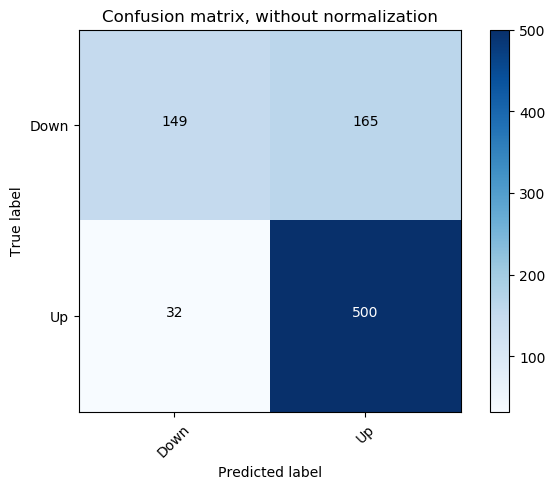

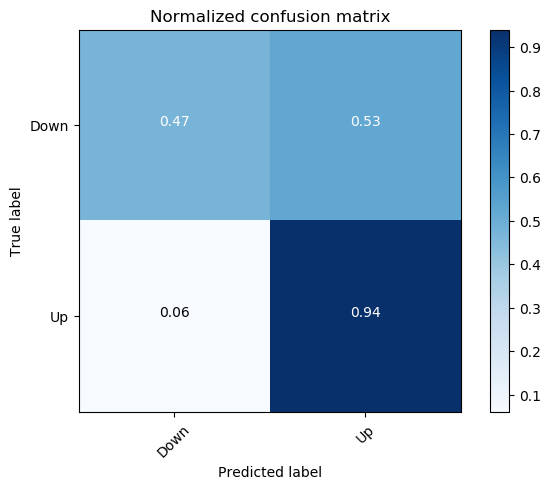

In [18]:
import itertools 
plt.style.use('default')
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Down', 'Up'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Down','Up'], normalize=True,
                      title='Normalized confusion matrix')

In [19]:
from sklearn.ensemble import RandomForestClassifier

# Extract feature labels
feat_labels = df.columns[:-1]

# Create Random Forest object, fit data and
# extract feature importance attributes
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)
importances = forest.feature_importances_

In [20]:
# Sort output (by relative importance) and 
# print top 15 features
indices = np.argsort(importances)[::-1]
n = 15
for i in range(n):
    print('{0:2d}) {1:7s} {2:6.4f}'.format(i + 1, 
                                           feat_labels[indices[i]],
                                           importances[indices[i]]))

 1) 90dUSBills 0.0516
 2) USInflation 0.0335
 3) dowjones 0.0308
 4) 1yUSTreasuryBond 0.0291
 5) pcf     0.0274
 6) pe_op_dil 0.0266
 7) fcf_ocf 0.0264
 8) divyield 0.0261
 9) return4months 0.0242
10) PEG_1yrforward 0.0237
11) ptb     0.0233
12) cash_lt 0.0232
13) 5yUSTreasuryBond 0.0230
14) PEG_ltgforward 0.0207
15) return3months 0.0197


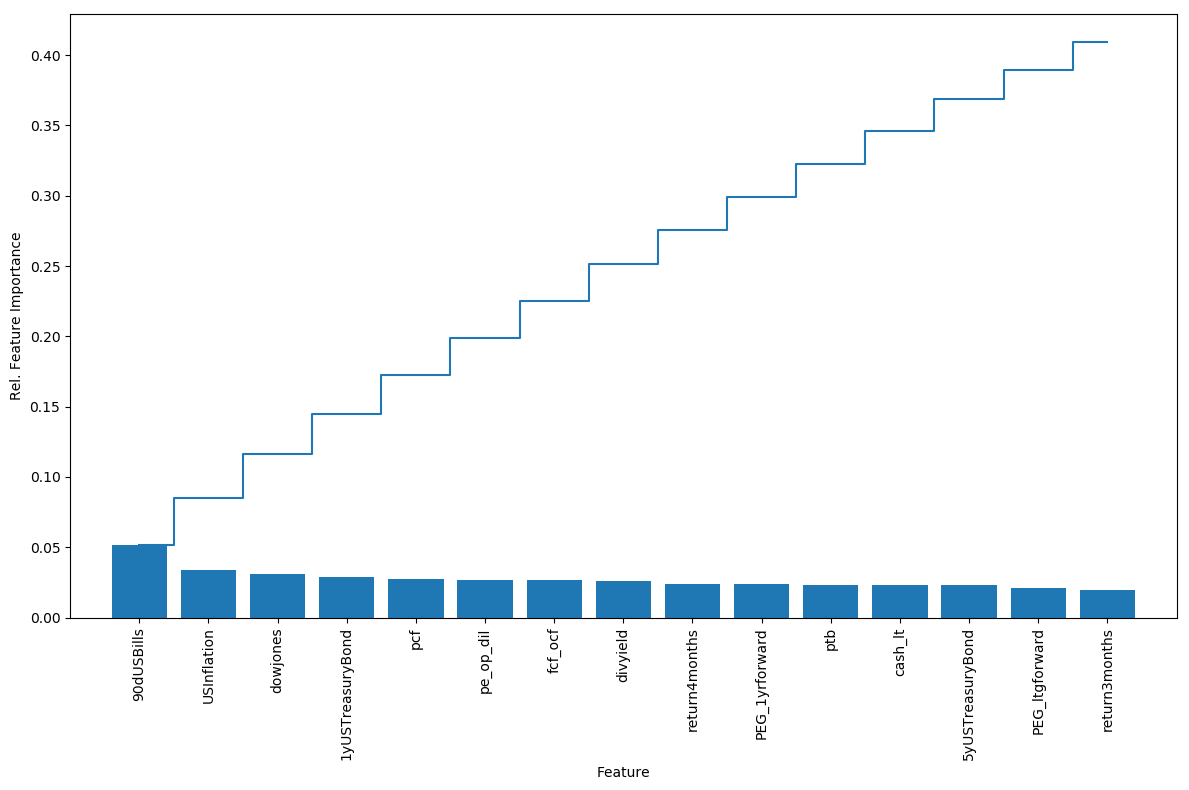

In [21]:
# Get cumsum of the n most important features
feat_imp = np.sort(importances)[::-1]
sum_feat_imp = np.cumsum(feat_imp)[:n]

# Plot Feature Importance (both cumul., individual)
plt.figure(figsize=(12, 8))
plt.bar(range(n), importances[indices[:n]], align='center')
plt.xticks(range(n), feat_labels[indices[:n]], rotation=90)
plt.xlim([-1, n])
plt.xlabel('Feature')
plt.ylabel('Rel. Feature Importance')
plt.step(range(n), sum_feat_imp, where='mid', 
         label='Cumulative importance')
plt.tight_layout();

### PCA

In [22]:
from sklearn.decomposition import PCA

# Define no. of PC
q = 59

# Create PCA object and fit to find  
# first q principal components
pca = PCA(n_components=q)
pca.fit(X_train)
pca

PCA(copy=True, iterated_power='auto', n_components=59, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [23]:
# Run PCA for all possible PCs
pca = PCA().fit(X_train)

# Define max no. of PC
q = X_train.shape[1]

# Get cumsum of the PC 1-q
expl_var = pca.explained_variance_ratio_
sum_expl_var = np.cumsum(expl_var)[:q]


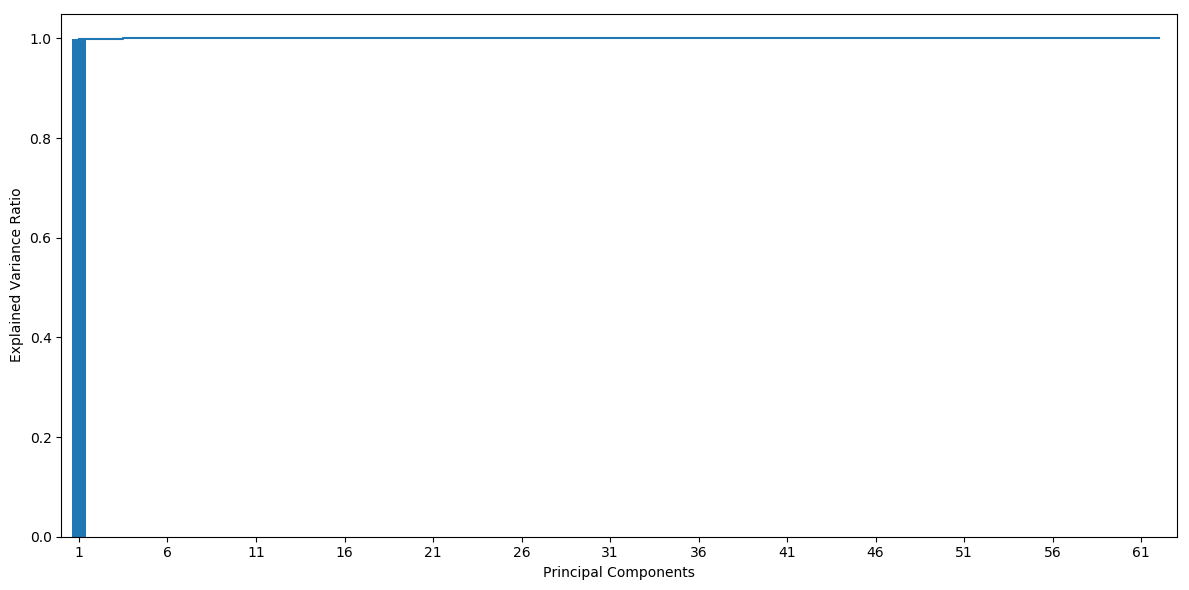

In [24]:
# Plot Feature Importance (both cumul., individual)
plt.figure(figsize=(12, 6))
plt.bar(range(1, q + 1), expl_var, align='center')
plt.xticks(range(1, q + 1, 5))
plt.xlim([0, q + 1])
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.step(range(1, 1 + q), sum_expl_var, where='mid')
plt.tight_layout();

### Decision Tree
Only included for graphical purpose, not used later on in the analysis.

In [25]:
import graphviz
from sklearn.tree import export_graphviz

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=4)
tree.fit(X_train, y_train)

feature_names = []
for i in df:
    feature_names.append(i)
    
feature_names = feature_names[:]

# Create decision tree object
dot_data = export_graphviz(tree, filled=True, rounded=True,
                           class_names=['Loss', 'BrEven'],
                           feature_names=feature_names[:-1], 
                           out_file=None)

# Visualize/Plot graph
graph = graphviz.Source(dot_data)  
graph

ModuleNotFoundError: No module named 'graphviz'